# MIMIC EDA

- MIMIC (Medical Information Mart for Intensive Care) is a large, freely-available database comprising deidentified health-related data from patients who were admitted to the critical care units of the Beth Israel Deaconess Medical Center.
- MIMIC-IV contains data from 2008-2019. The data was collected from Metavision bedside monitors.

Main Modules:

- `HOSP` (Hospital): The Hosp module provides all data acquired from the hospital wide electronic health record. Information covered includes patient and admission information, laboratory measurements, microbiology, medication administration, and billed diagnoses.

- `ICU` (Intensive Care Unit) Module: The ICU module contains information collected from the clinical information system used within the ICU. Documented data includes intravenous administrations, ventilator settings, and other charted items.

- `ED` (Emergency Department) Module: The ED module contains data for emergency department patients collected while they are in the ED. Information includes reason for admission, triage assessment, vital signs, and medicine reconciliaton. The subject_id and hadm_id identifiers allow MIMIC-IV-ED to be linked to other MIMIC-IV modules.

## Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# preprocessing imports
from preprocessing.preprocessor import Preprocessor
from preprocessing.utils import Utils
from config import FILE_PATHS


In [4]:
# Define file paths
file_paths = {
    'edstays': "../ED/edstays.csv",
    'admissions': "../HOSP/admissions.csv",
    'transfers': "../HOSP/transfers.csv",
    'diagnosis': "../ED/diagnosis.csv",
    'triage': "../ED/triage.csv",
    'vitalsigns': '../ED/vitalsign.csv',
    'medrecon': '../ED/medrecon.csv',
    'icd10_codes': "../Data/diagnosis_icd10_codes.csv",
    'icd9_codes': "../Data/diagnosis_icd9_codes.csv"
}

Using the Preprocessor class with configured file paths, we can preprocess all the tables in MIMIC-IV. The preprocessed data is stored in a dictionary, where the keys are the table names and the values are the preprocessed DataFrames.

To note, the main preprocessing steps include:
- Converting datetime columns to datetime objects
- Computing length of stay
- Mapping categorical values to broader categories
- Imputing missing values
- Topic modeling for triage data specifically
- Conversion of dtypes to appropriate types for memory efffiency



In [5]:
# suppress warnings
pd.options.mode.chained_assignment = None

# instantiate the preprocessor class to aid cleaning the data
preprocessor = Preprocessor(file_paths)
# preprocess all the tables in MIMIC-IV
#preprocessed_data = preprocessor.preprocess_all()

# Exploratory Data Analysis (EDA) of the MIMIC-IV dataset 

- Data Distribution and Shape
- Missing Values
- Outliers 
- Correlations
- Feature Engineering

## Hospital (HOSP)Data

- Here we will be using the admissions and transfers tables from the MIMIC-IV dataset.

### Admissions Table

The admissions table gives information regarding a patient’s admission to the hospital. Since each unique hospital visit for a patient is assigned a unique hadm_id, the admissions table can be considered as a definition table for hadm_id. Information available includes timing information for admission and discharge, demographic information, the source of the admission, and so on.



In [5]:
admissions_df = preprocessed_data['admissions']
admissions_df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,admission_los_hours,is_dead
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaT,URGENT,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,White/European Descent,2180-05-06 19:17:00,2180-05-06 23:30:00,0,18.866667,False
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaT,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,White/European Descent,2180-06-26 15:54:00,2180-06-26 21:31:00,0,24.366667,False
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaT,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,White/European Descent,2180-08-05 20:58:00,2180-08-06 01:44:00,0,42.100000,False
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaT,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,White/European Descent,2180-07-23 05:54:00,2180-07-23 14:00:00,0,53.333333,False
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaT,EU OBSERVATION,EMERGENCY ROOM,NaN,NaN,English,SINGLE,White/European Descent,2160-03-03 21:55:00,2160-03-04 06:26:00,0,7.166667,False


### Transfers Table

In [6]:
transfers_df = preprocessed_data['transfers']
transfers_df.head()

,subject_id,hadm_id,transfer_id,eventtype,careunit,intime,outtime
0,10000032,22595853.0,33258284,ED,Emergency Department,2180-05-06 19:17:00,2180-05-06 23:30:00
1,10000032,22595853.0,35223874,admit,Transplant,2180-05-06 23:30:00,2180-05-07 17:21:27
2,10000032,22595853.0,36904543,discharge,UNKNOWN,2180-05-07 17:21:27,NaN
3,10000032,22841357.0,34100253,discharge,UNKNOWN,2180-06-27 18:49:12,NaN
4,10000032,22841357.0,34703856,admit,Transplant,2180-06-26 21:31:00,2180-06-27 18:49:12


### Patients Table

### Hospital Diagnosis Table

## Emergency Department (ED) Data

- We will be using the ED Stays, diagnosis, triage, and vital signs t

If a subject does not have an `hadm_id`, it implies the patient visited the Emergency Department but was not subsequently admitted to the hosptial

Specifically:
1. The patient came to the ED for evaluation and treatment
2. After their ED visit, they were discharged directly from the ED rather than being admiteed as an inpatient to the hospital
3. The ED visit did not result in a hospital admission, so no hospital admission ID was generated
4. These patients could represent less severe cases that could be treated and released from the ED without requiring inpatint care
5. The patient may have been sent home, or possibly transfered to another facility, but they did not occupy an inpatient bed at the hospital associated with this ED visit

### ED Stays Table

The edstays table is the primary tracking table for emergency department visits. It provides the time the patient entered the emergency department and the time they left the emergency department.

Table source: Emergency department information system.

Table purpose: Track patient admissions to the emergency department.

Number of rows: 425,087

In [15]:
ed_stays_df = preprocessor.preprocess_table('edstays')
ed_stays_df.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,ed_los_hours,admitted
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,White/European Descent,AMBULANCE,ADMITTED,4.216667,True
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,White/European Descent,AMBULANCE,ADMITTED,5.616667,True
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,White/European Descent,AMBULANCE,ADMITTED,4.766667,True
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,White/European Descent,AMBULANCE,HOME,13.500000,True
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,White/European Descent,AMBULANCE,ADMITTED,8.100000,True


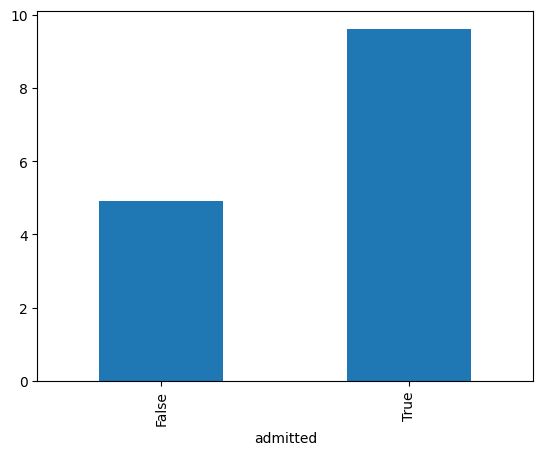

In [16]:
# ed_los_hours vs admitted 

ed_stays_df.groupby("admitted")['ed_los_hours'].mean().plot.bar()
plt.show()

In [17]:
Utils.print_info(ed_stays_df)


DataFrame Information for: edstays

Shape:
  Rows: 425087, Columns: 11

Column Types:
  int64: 2
  float64: 2
  datetime64[ns]: 2
  category: 1
  category: 1
  category: 1
  category: 1
  bool: 1

Missing Values:
  hadm_id: 222071 (52.24%)

Numeric Columns Summary:
         subject_id       hadm_id       stay_id   ed_los_hours
count  4.250870e+05  2.030160e+05  4.250870e+05  425087.000000
mean   1.500871e+07  2.499495e+07  3.499735e+07       7.158327
std    2.878486e+06  2.888745e+06  2.888342e+06       6.628000
min    1.000003e+07  2.000002e+07  3.000001e+07     -22.733333
25%    1.251789e+07  2.248982e+07  3.249799e+07       3.533333
50%    1.501628e+07  2.499935e+07  3.499395e+07       5.466667
75%    1.749900e+07  2.749388e+07  3.750387e+07       8.316667
max    1.999999e+07  2.999981e+07  3.999996e+07     493.069444

Categorical Columns Summary:
  gender:
    Unique values: 2
    Top 5 values: {'F': 229898, 'M': 195189}
  race:
    Unique values: 6
    Top 5 values: {'White/Europ

### Triage Data from ED

The triage table contains information about the patient when they were first triaged in the emergency department. Patients are assessed at triage by a single care provider and asked a series of questions to assess their current health status. Their vital signs are measured and a level of acuity is assigned. Based on the level of acuity, the patient either waits in the waiting room for later attention, or is prioritized for immediate care.

In [9]:
triage_df = preprocessed_data['triage']

Utils.print_info(triage_df)


DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 425087, Columns: 12

Column Types:
  float64: 6
  int64: 2
  object: 2
  category: 2

Missing Values:
  temperature: 23415 (5.51%)
  heartrate: 17090 (4.02%)
  resprate: 20353 (4.79%)
  o2sat: 20596 (4.85%)
  sbp: 18291 (4.30%)
  dbp: 19091 (4.49%)
  pain: 12933 (3.04%)
  acuity: 6987 (1.64%)

Numeric Columns Summary:
         subject_id       stay_id    temperature      heartrate       resprate          o2sat            sbp            dbp
count  4.250870e+05  4.250870e+05  401672.000000  407997.000000  404734.000000  404491.000000  406796.000000  405996.000000
mean   1.500871e+07  3.499735e+07      98.015046      85.079891      17.565521      98.471888     135.395352      81.262126
std    2.878486e+06  2.888342e+06       4.008575      18.041690       5.485706      17.040807     240.956408    1057.220031
min    1.000003e+07  3.000001e+07       0.100000       1.000000       0.000000       0.000000       1.000000       0.00000

### Diagnosis Data from ED

The diagnosis table provides billed diagnoses for patients. Diagnoses are determined after discharge from the emergency department.

Table source: Emergency department information system.

Table purpose: Track patient admissions to the emergency department.

Number of rows: 899,050

In [25]:
# get the table and print general information
diagnosis_df = preprocessor.preprocess_table('diagnosis')
Utils.print_info(diagnosis_df)


DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 899050, Columns: 8

Column Types:
  int64: 3
  category: 1
  object: 1
  category: 1
  category: 1
  category: 1

Missing Values:
  No missing values

Numeric Columns Summary:
         subject_id       stay_id    icd_version
count  8.990500e+05  8.990500e+05  899050.000000
mean   1.500838e+07  3.500095e+07       9.507241
std    2.879810e+06  2.888942e+06       0.499948
min    1.000003e+07  3.000001e+07       9.000000
25%    1.251347e+07  3.250347e+07       9.000000
50%    1.502022e+07  3.499600e+07      10.000000
75%    1.750406e+07  3.751290e+07      10.000000
max    1.999999e+07  3.999996e+07      10.000000

Categorical Columns Summary:
  icd_code:
    Unique values: 13199
    Top 5 values: {'4019': 26816, 'I10': 21264, 'R079': 13016, '78650': 12398, '25000': 12026}
  icd_title:
    Unique values: 13172
    Top 5 values: {'HYPERTENSION NOS': 26816, 'Essential (primary) hypertension': 21264, 'Chest pain, unspecified': 13016

In [26]:
diagnosis_df.dtypes

subject_id          int64
stay_id             int64
icd_code         category
icd_version         int64
icd_title          object
category_code    category
category         category
subcategory      category
dtype: object

In [27]:
diagnosis_df.sample(10)

,subject_id,stay_id,icd_code,icd_version,icd_title,category_code,category,subcategory
840781,18709925,32898598,E1065,10,Type 1 diabetes mellitus with hyperglycemia,E10,Endocrine & Metabolic,Diabetes mellitus
747236,16651485,32449430,I10,10,Essential (primary) hypertension,I10,Circulatory System,Hypertensive diseases
506995,11412923,39103905,R0989,10,Oth symptoms and signs involving the circ and ...,R09,Symptoms & Abnormal Findings,Symptoms and signs involving the circulatory a...
459863,10376494,33102273,I10,10,Essential (primary) hypertension,I10,Circulatory System,Hypertensive diseases
249180,15622314,39594045,78906,9,ABDOMINAL PAIN EPIGASTRIC,789,Symptoms & Abnormal Findings,Symptoms
280444,16352630,37612585,7242,9,LUMBAGO,724,Musculoskeletal & Connective,Dorsopathies
306026,16919055,31806467,78903,9,ABDOMINAL PAIN RLQ,789,Symptoms & Abnormal Findings,Symptoms
411996,19299068,30867740,78650,9,CHEST PAIN NOS,786,Symptoms & Abnormal Findings,Symptoms
78241,11792886,36027346,4280,9,"CONGESTIVE HEART FAILURE, UNSPEC",428,Circulatory System,Other Forms Of Heart Disease
639756,14340505,31073681,R1011,10,Right upper quadrant pain,R10,Symptoms & Abnormal Findings,Symptoms and signs involving the digestive sys...


In [31]:
diagnosis_df.groupby('icd_version')['category'].value_counts().unstack(fill_value=0).T

icd_version,9,10
category,,
Blood & Immune System,4126,4612
Circulatory System,49165,33791
Congenital & Chromosomal,175,119
Digestive System,19122,18755
Ear & Mastoid,0,1412
Endocrine & Metabolic,32815,22513
External Causes,0,27161
Eye & Adnexa,0,2596
Genitourinary System,19732,17632


In [36]:
# save as pickle file
diagnosis_df.to_pickle("../Data/ed_diagnosis_df.pkl")

### Final ED Table

In [24]:
# Combining ED tables into a single dataframe

ed_stays_triage_df = ed_stays_df.merge(triage_df, on=['subject_id', 'stay_id'], how='inner')

ed_stays_triage_df.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,ed_los_hours,...,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,topic,topic_label
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,White/European Descent,AMBULANCE,ADMITTED,4.216667,...,98.4,70.0,16.0,97.0,106.0,63.0,0,3,1,General Pain & Weakness
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,White/European Descent,AMBULANCE,ADMITTED,5.616667,...,98.9,88.0,18.0,97.0,116.0,88.0,10,3,1,General Pain & Weakness
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,White/European Descent,AMBULANCE,ADMITTED,4.766667,...,99.4,105.0,18.0,96.0,106.0,57.0,10,3,5,Limb & Head Pain
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,White/European Descent,AMBULANCE,HOME,13.500000,...,97.8,87.0,14.0,97.0,71.0,43.0,7,2,2,Respiratory & Trauma Symptoms
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,White/European Descent,AMBULANCE,ADMITTED,8.100000,...,98.7,77.0,16.0,98.0,96.0,50.0,13,2,1,General Pain & Weakness


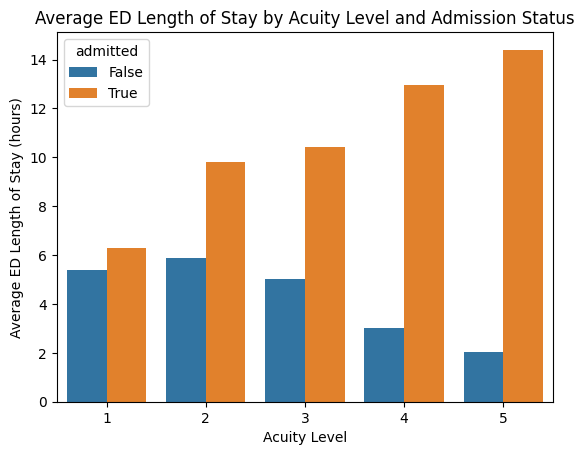

In [23]:
# bar chart of ed_los_hours by acuity level

sns.barplot(data=ed_stays_triage_df, x="acuity", y="ed_los_hours", hue="admitted", errorbar = None)
plt.title("Average ED Length of Stay by Acuity Level and Admission Status")
plt.xlabel("Acuity Level")
plt.ylabel("Average ED Length of Stay (hours)")
plt.show()

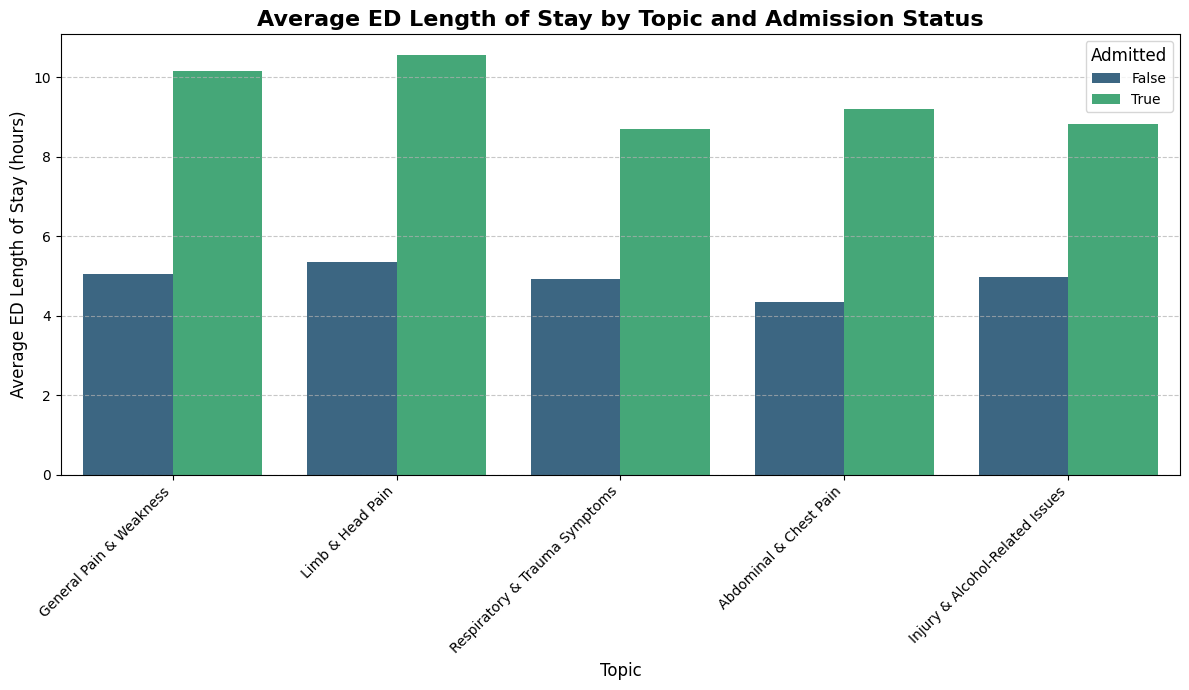

In [34]:
# Set a nice style for the plot

# Create the figure with a larger size and higher DPI for better quality
plt.figure(figsize=(12, 7), dpi=100)

# Create the bar plot with a more appealing color palette
sns.barplot(data=ed_stays_triage_df, x="topic_label", y="ed_los_hours", hue="admitted", 
            errorbar=None, palette="viridis")

# Customize the title and labels
plt.title("Average ED Length of Stay by Topic and Admission Status", fontsize=16, fontweight='bold')
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Average ED Length of Stay (hours)", fontsize=12)

# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Customize the legend
plt.legend(title="Admitted", title_fontsize='12', fontsize='10')

# Adjust the layout and add a grid for better readability
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## ICU Data

# Conclusions

In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = ['ed_los_hours', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'acuity']
categorical_features = ['gender', 'race_x', 'arrival_transport', 'disposition', 'admission_type', 'admission_location', 
                        'insurance', 'language', 'marital_status', 'category_code', 'category', 'topic']

# Create preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data and transform both training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert to dense arrays if needed (e.g., for certain models)
X_train_preprocessed = X_train_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()

print("Preprocessed training data shape:", X_train_preprocessed.shape)
print("Preprocessed test data shape:", X_test_preprocessed.shape)



Preprocessed training data shape: (1175972, 1209)
Preprocessed test data shape: (293993, 1209)


In [16]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = (numeric_features + 
                 preprocessor.named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names(categorical_features).tolist())

# Sort features by importance
sorted_idx = feature_importance.argsort()
top_10_idx = sorted_idx[-10:]

print("\nTop 10 Most Important Features:")
for idx in top_10_idx[::-1]:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")


Random Forest Classifier Accuracy: 0.9735

Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99    286189
        True       0.00      0.00      0.00      7804

    accuracy                           0.97    293993
   macro avg       0.49      0.50      0.49    293993
weighted avg       0.95      0.97      0.96    293993



/Users/julienh/Desktop/MADS/Milestone1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julienh/Desktop/MADS/Milestone1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julienh/Desktop/MADS/Milestone1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

: 